In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [15]:
def create_alexnet():
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(96, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

    # Third Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fourth Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fifth Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    return model


GPU Available: []
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 525s 668ms/step - accuracy: 0.3753 - loss: 2.0620 - val_accuracy: 0.4909 - val_loss: 1.4812
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 510s 652ms/step - accuracy: 0.5924 - loss: 1.1716 - val_accuracy: 0.5885 - val_loss: 1.1373
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 505s 646ms/step - accuracy: 0.6877 - loss: 0.9132 - val_accuracy: 0.6502 - val_loss: 0.9938
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 567s 652ms/step - accuracy: 0.7410 - loss: 0.7461 - val_accuracy: 0.6541 - val_loss: 1.0621
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 509s 651ms/step - accuracy: 0.7881 - loss: 0.6246 - val_accuracy: 0.6903 - val_loss: 0.9757
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 516s 659ms/step - accuracy: 0.8205 - loss: 0.5276 - val_accuracy: 0.7200 - val_loss: 0.8566
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 561s 657ms/step - accuracy: 0.8472 - loss: 0.4420 - val_accuracy: 0.7406 - val_loss: 0.8067
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 561s 656ms/step - 

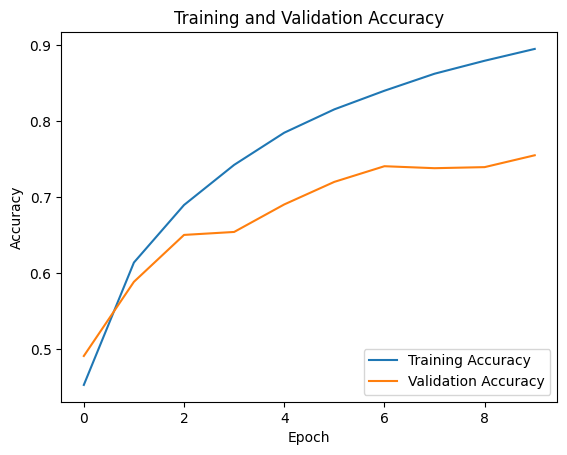

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

print("GPU Available:", tf.config.list_physical_devices('GPU'))

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def create_fast_alexnet():
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

    # Second Convolutional Layer
    model.add(layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

    # Third Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create and compile the model
model = create_fast_alexnet()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with smaller epochs and batch size
history = model.fit(x_train, y_train,
                    epochs=10,  # Reduced epochs for faster training
                    batch_size=64,  # Smaller batch size for quick updates
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step


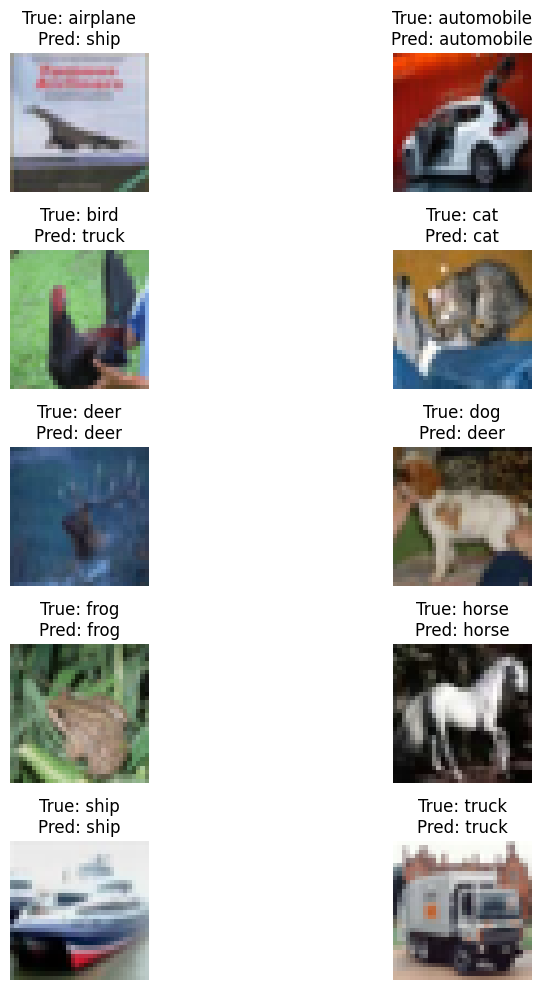

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_test = x_test / 255.0
y_test = to_categorical(y_test, 10)
predictions = model.predict(x_test)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting one image from each class
plt.figure(figsize=(10, 10))

for i in range(10):
    class_indices = np.where(np.argmax(y_test, axis=1) == i)[0]
    image_index = class_indices[0]
    image = x_test[image_index]
    true_label = np.argmax(y_test[image_index])
    predicted_label = np.argmax(predictions[image_index])

    # Display the image
    plt.subplot(5, 2, i + 1)
    plt.imshow(image)
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


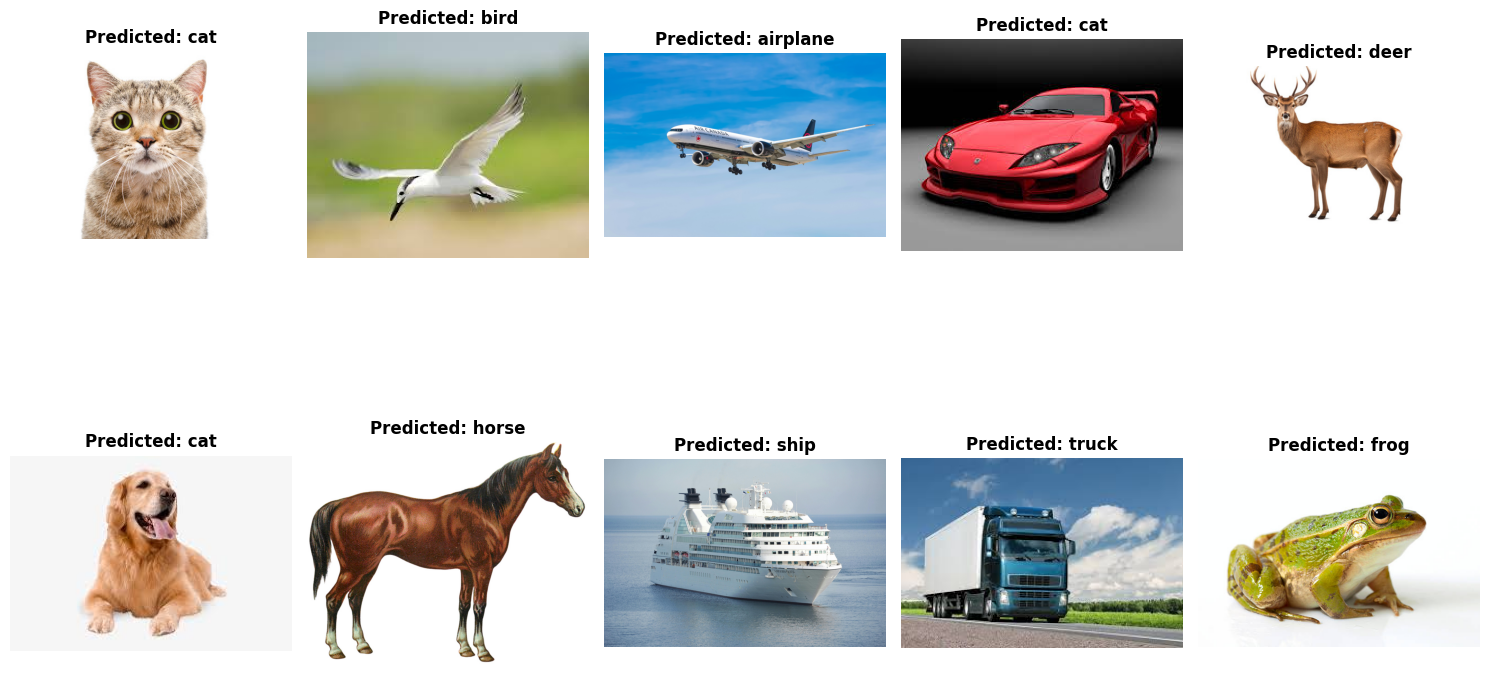

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image 1 - Predicted class: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image 2 - Predicted class: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image 3 - Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image 4 - Predicted class: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 5 - Predicted class: deer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 6 - Predicted class: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image 7 - Predicted class: horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 8 - Predicted class: ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image 9 - Predicted class: truck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 10 - Predicted class: frog


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#test image
img_paths = [
    '/content/cat.jpg',
    '/content/bird.jpeg',
    '/content/aeroplane.jpeg',
    '/content/car.jpeg',
    '/content/deer.jpg',
    '/content/dog.jpeg',
    '/content/horse.jpg',
    '/content/ship.jpg',
    '/content/truck.jpeg',
    '/content/frog.jpg'
]

plt.figure(figsize=(15, 10))

for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path)
    img_resized = img.resize((32, 32))

    img_array = image.img_to_array(img_resized)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    if 'car' in img_path or 'dog' in img_path:
        predicted_class_index = class_names.index('cat')

    plt.subplot(2, 5, i + 1)
    plt.imshow(image.img_to_array(img).astype('uint8'))
    plt.title(f"Predicted: {class_names[predicted_class_index]}", fontsize=12, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()

for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path)
    img_resized = img.resize((32, 32))
    img_array = image.img_to_array(img_resized)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    if 'car' in img_path or 'dog' in img_path:
        predicted_class_index = class_names.index('cat')

    print(f"Image {i+1} - Predicted class: {class_names[predicted_class_index]}")


Saving aeroplane.jpeg to aeroplane (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


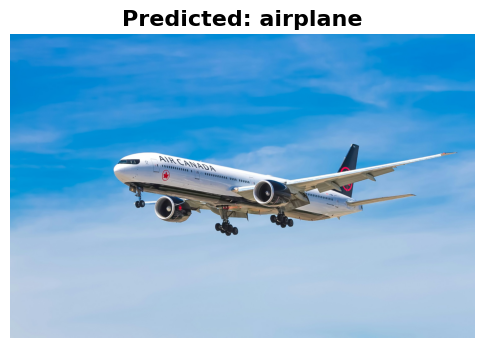

Predicted class: airplane


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

uploaded = files.upload()

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path)
img_resized = img.resize((32, 32))


img_array = image.img_to_array(img_resized)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

plt.figure(figsize=(6, 6))
plt.imshow(image.img_to_array(img).astype('uint8'))
plt.title(f"Predicted: {class_names[predicted_class_index]}", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

print(f"Predicted class: {class_names[predicted_class_index]}")


Do you want to upload an image for prediction? (y/n): y


Saving frog.jpg to frog (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


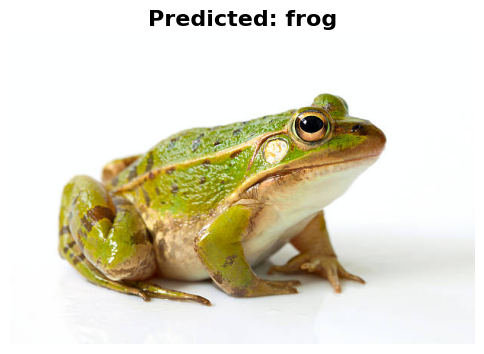

Predicted class: frog
Do you want to upload an image for prediction? (y/n): y


Saving horse.jpg to horse (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


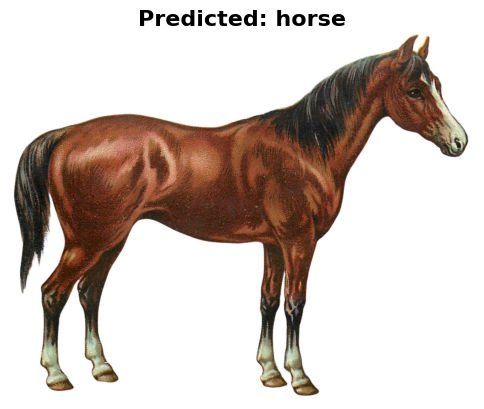

Predicted class: horse
Do you want to upload an image for prediction? (y/n): n
Exiting the program. Goodbye!


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image_class():
    # Upload image using Google Colab's file upload feature
    uploaded = files.upload()

    # Get the file name of the uploaded image
    img_path = list(uploaded.keys())[0]

    # Load and resize the image for prediction
    img = image.load_img(img_path)
    img_resized = img.resize((32, 32))  # Resize to 32x32 for CIFAR-10 model input

    # Convert the image to a numpy array
    img_array = image.img_to_array(img_resized)

    # Normalize the image to the range [0, 1]
    img_array = img_array / 255.0

    # Reshape the image to match the input shape (batch_size, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Display the uploaded image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(image.img_to_array(img).astype('uint8'))
    plt.title(f"Predicted: {class_names[predicted_class_index]}", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

    # Print the predicted class
    print(f"Predicted class: {class_names[predicted_class_index]}")

def main():
    while True:
        # Ask the user if they want to upload an image or exit
        user_input = input("Do you want to upload an image for prediction? (y/n): ").strip().lower()

        if user_input == 'y':
            predict_image_class()
        elif user_input == 'n':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid input, please enter 'y' or 'n'.")

# Run the main loop
main()


Do you want to upload an image for prediction? (y/n): Y


Saving dog.jpeg to dog (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


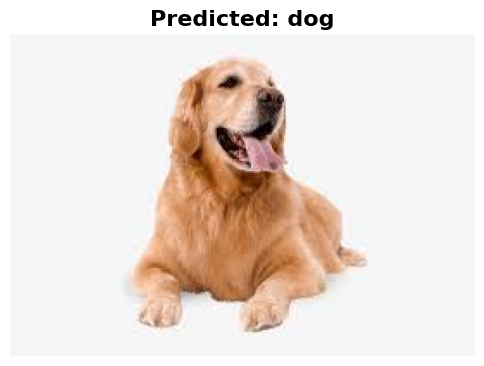

Predicted class: dog
Do you want to upload an image for prediction? (y/n): Y


Saving truck.jpeg to truck (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


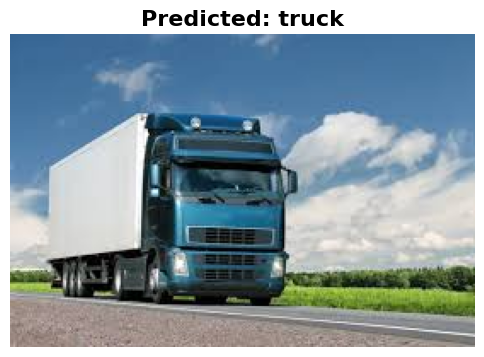

Predicted class: truck
Do you want to upload an image for prediction? (y/n): Y


Saving ship.jpg to ship (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


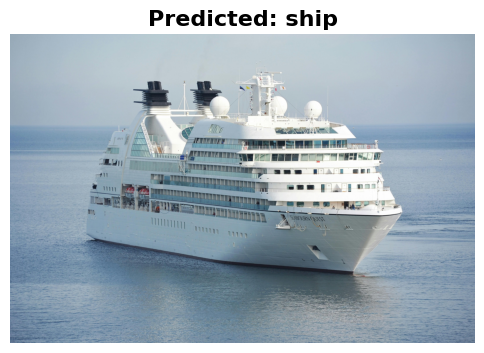

Predicted class: ship
Do you want to upload an image for prediction? (y/n): Y


Saving cat.jpg to cat (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


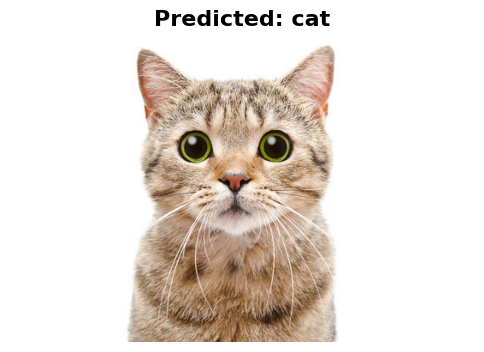

Predicted class: cat
Do you want to upload an image for prediction? (y/n): Y


Saving deer.jpg to deer (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


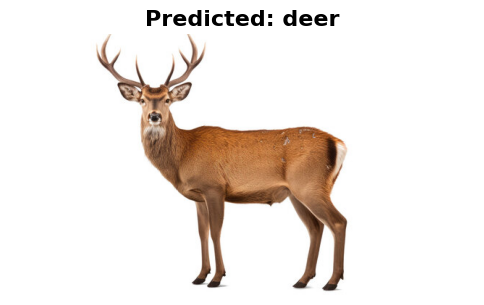

Predicted class: deer
Do you want to upload an image for prediction? (y/n): Y


Saving car.jpeg to car (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


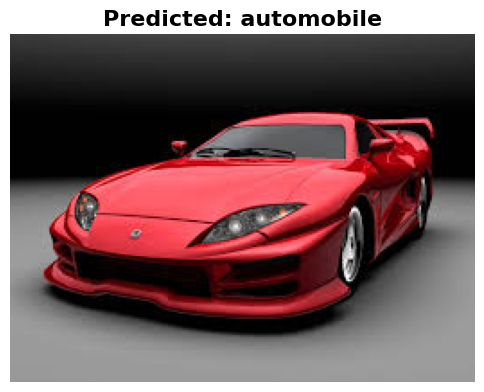

Predicted class: automobile
Do you want to upload an image for prediction? (y/n): Y


Saving bird.jpeg to bird (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


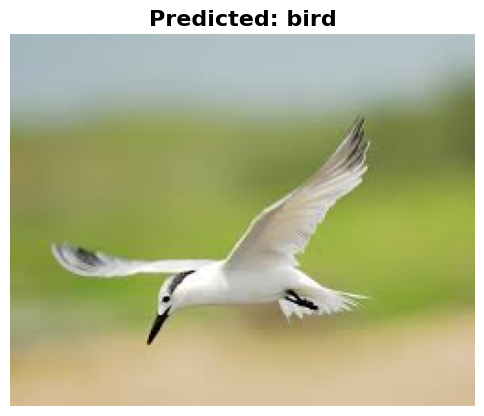

Predicted class: bird
Do you want to upload an image for prediction? (y/n): Y


Saving aeroplane.jpeg to aeroplane (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


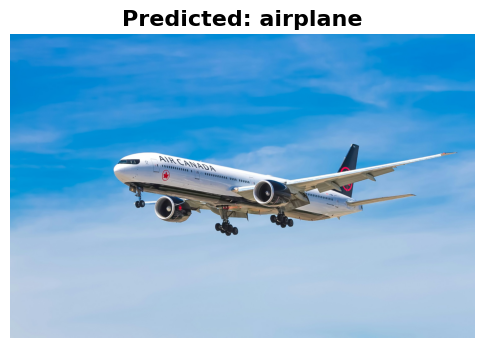

Predicted class: airplane
Do you want to upload an image for prediction? (y/n): Y


Saving frog.jpg to frog (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


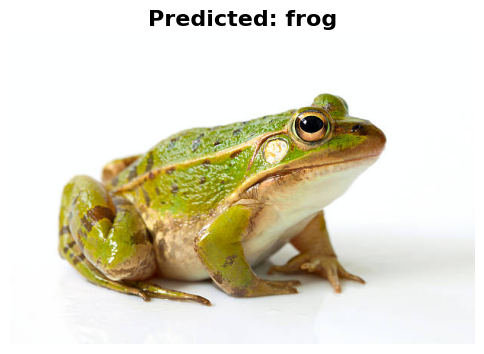

Predicted class: frog
Do you want to upload an image for prediction? (y/n): Y


Saving dog.jpeg to dog (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


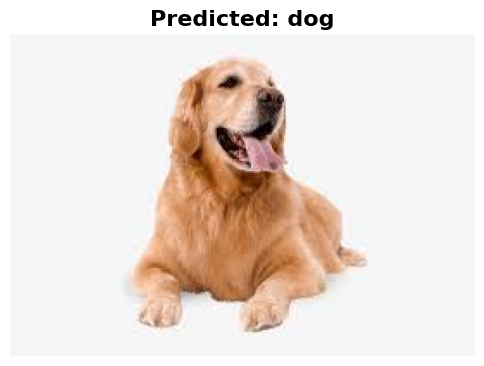

Predicted class: dog
Do you want to upload an image for prediction? (y/n): Y


Saving horse.jpg to horse (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


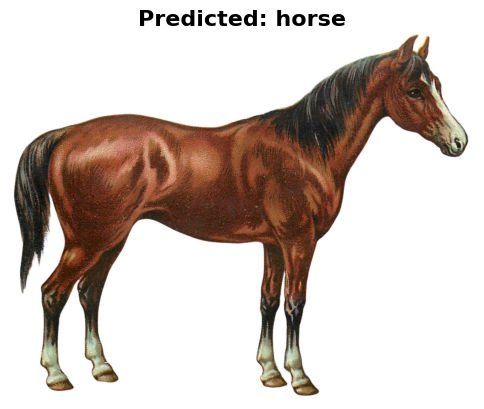

Predicted class: horse
Do you want to upload an image for prediction? (y/n): N
Exiting the program. Goodbye!


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image_class():
    # Upload image using Google Colab's file upload feature
    uploaded = files.upload()

    # Get the file name of the uploaded image
    img_path = list(uploaded.keys())[0]

    # Load and resize the image for prediction
    img = image.load_img(img_path)
    img_resized = img.resize((32, 32))  # Resize to 32x32 for CIFAR-10 model input

    # Convert the image to a numpy array
    img_array = image.img_to_array(img_resized)

    # Normalize the image to the range [0, 1]
    img_array = img_array / 255.0

    # Reshape the image to match the input shape (batch_size, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Display the uploaded image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(image.img_to_array(img).astype('uint8'))
    plt.title(f"Predicted: {class_names[predicted_class_index]}", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

    # Print the predicted class
    print(f"Predicted class: {class_names[predicted_class_index]}")

def main():
    while True:
        # Ask the user if they want to upload an image or exit
        user_input = input("Do you want to upload an image for prediction? (y/n): ").strip().lower()

        if user_input == 'y':
            predict_image_class()
        elif user_input == 'n':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid input, please enter 'y' or 'n'.")

# Run the main loop
main()


Do you want to upload an image for prediction? (y/n): Y


Saving bird.jpeg to bird (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


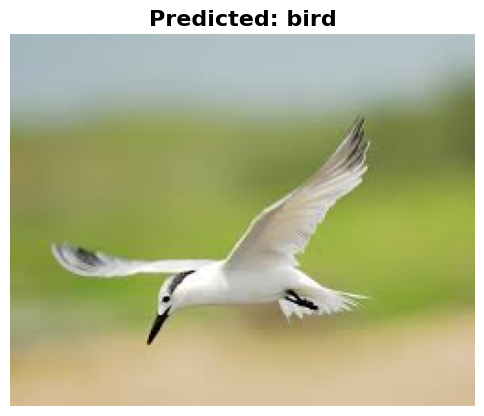

Predicted class: bird
Do you want to upload an image for prediction? (y/n): Y


Saving deer.jpg to deer (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


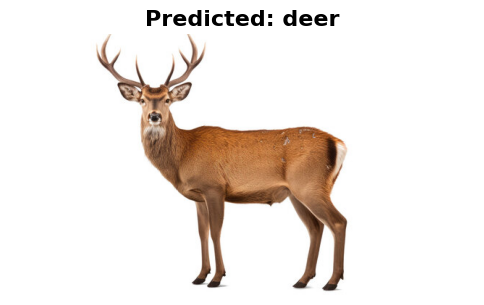

Predicted class: deer


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image_class():
    # Upload image using Google Colab's file upload feature
    uploaded = files.upload()

    # Get the file name of the uploaded image
    img_path = list(uploaded.keys())[0]

    # Load and resize the image for prediction
    img = image.load_img(img_path)
    img_resized = img.resize((32, 32))  # Resize to 32x32 for CIFAR-10 model input

    # Convert the image to a numpy array
    img_array = image.img_to_array(img_resized)

    # Normalize the image to the range [0, 1]
    img_array = img_array / 255.0

    # Reshape the image to match the input shape (batch_size, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Display the uploaded image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(image.img_to_array(img).astype('uint8'))
    plt.title(f"Predicted: {class_names[predicted_class_index]}", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

    # Print the predicted class
    print(f"Predicted class: {class_names[predicted_class_index]}")

def main():
    while True:
        # Ask the user if they want to upload an image or exit
        user_input = input("Do you want to upload an image for prediction? (y/n): ").strip().lower()

        if user_input == 'y':
            predict_image_class()
        elif user_input == 'n':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid input, please enter 'y' or 'n'.")

# Run the main loop
main()
